<a href="https://colab.research.google.com/github/DhruvGangwani/HandwritingDigitRecognition/blob/master/Life_Expectancy_(WHO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Data**



In [2]:
import pandas as pd
data = pd.read_csv('life.csv')
data.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19 years,thinness_5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


**Plotting Dependent Variable (Target)**

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


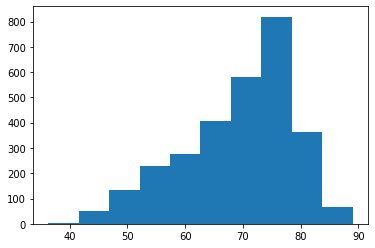

In [3]:
import matplotlib.pyplot as plt
plt.hist(data['Life_expectancy'])
plt.show()

In [4]:
print('Shape of Data {}'.format(data.shape))

Shape of Data (2938, 22)


**Multi-Collinearity**

When independent Features are highly correlated i.e. have same nature, then they introduce the element of variance in the model. 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Multi-Collinearity Feature infant_deaths and Feature under-five_deaths --> Correlation Score 0.9966288820398191
Multi-Collinearity Feature percentage_expenditure and Feature GDP --> Correlation Score 0.8993726409895392
Multi-Collinearity Feature under-five_deaths and Feature infant_deaths --> Correlation Score 0.9966288820398191
Multi-Collinearity Feature GDP and Feature percentage_expenditure --> Correlation Score 0.8993726409895392
Multi-Collinearity Feature thinness_1-19 years and Feature thinness_5-9 years --> Correlation Score 0.9391019921914692
Multi-Collinearity Feature thinness_5-9 years and Feature thinness_1-19 years --> Correlation Score 0.9391019921914692
Multi-Collinearity Feature Income_composition_of_resources and Feature Schooling --> Correlation Score 0.8000924203919645
Multi-Collinearity Feature Schooling and Feature Income_composition_of_resources --> Correlation Score 0.8000924203919645


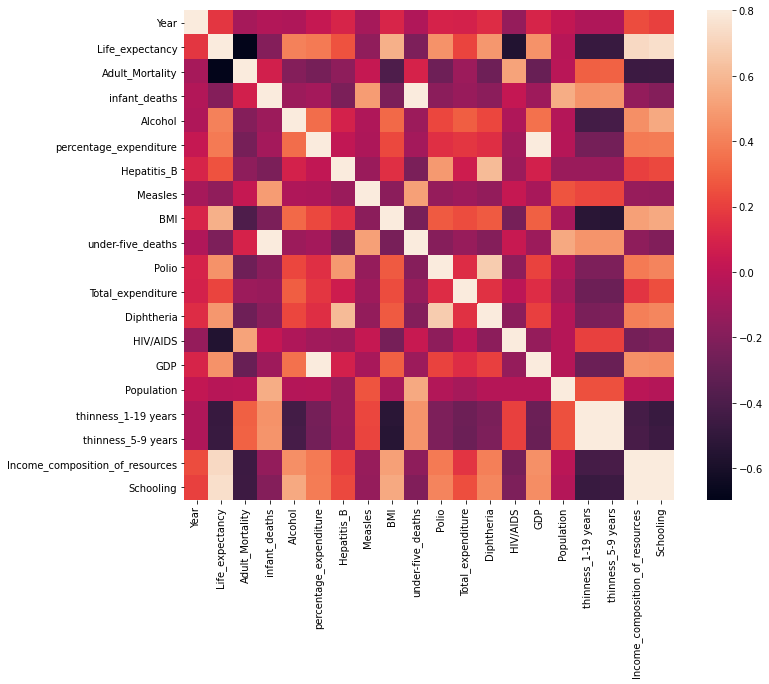

In [5]:
import seaborn as sns
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

for i in range(len(corrmat.columns)):
  for j in range(len(corrmat.index)):
    if corrmat.iloc[i,j]>0.80 and corrmat.iloc[i,j] != 1.0:
      print('Multi-Collinearity Feature {} and Feature {} --> Correlation Score {}'.format(corrmat.columns[i],corrmat.columns[j],corrmat.iloc[i,j]))

4 pairs of features have high correlation 



1.   infant_deaths and under-five_deaths
2.   percentage_expenditure and  GDP
3.   thinness_1-19 years and thinness_5-9 years
4.   Income_composition_of_resources and Schooling

Best Option to deal with multi-collinearity is to remove any one feature






In [0]:
data = data.drop(['thinness_5-9 years','GDP','infant_deaths'],axis=1)

**Finding Correlation of Dependent Variable with all independent variables**

In [7]:
corrmat['Life_expectancy']



Year                               0.170033
Life_expectancy                    1.000000
Adult_Mortality                   -0.696359
infant_deaths                     -0.196557
Alcohol                            0.404877
percentage_expenditure             0.381864
Hepatitis_B                        0.256762
Measles                           -0.157586
BMI                                0.567694
under-five_deaths                 -0.222529
Polio                              0.465556
Total_expenditure                  0.218086
Diphtheria                         0.479495
HIV/AIDS                          -0.556556
GDP                                0.461455
Population                        -0.021538
thinness_1-19 years               -0.477183
thinness_5-9 years                -0.471584
Income_composition_of_resources    0.724776
Schooling                          0.751975
Name: Life_expectancy, dtype: float64

Schooling and Income_composition_of_resources are highly positive correlated

::business::

Adult_Mortality is highly negatively correlated

**Removing Outliers**

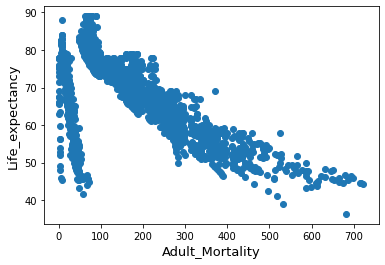

In [8]:
fig, ax = plt.subplots()
ax.scatter(x = data['Adult_Mortality'], y = data['Life_expectancy'])
plt.ylabel('Life_expectancy', fontsize=13)
plt.xlabel('Adult_Mortality', fontsize=13)
plt.show()

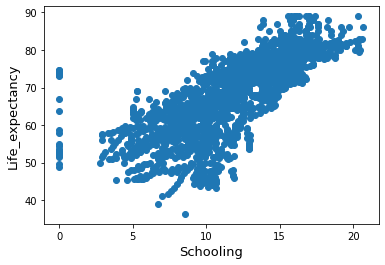

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = data['Schooling'], y = data['Life_expectancy'])
plt.ylabel('Life_expectancy', fontsize=13)
plt.xlabel('Schooling', fontsize=13)
plt.show()

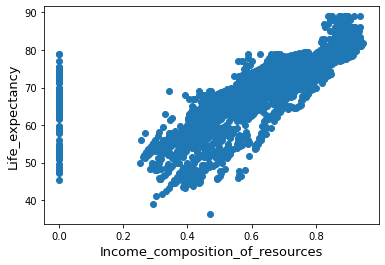

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = data['Income_composition_of_resources'], y = data['Life_expectancy'])
plt.ylabel('Life_expectancy', fontsize=13)
plt.xlabel('Income_composition_of_resources', fontsize=13)
plt.show()

In [0]:
data = data.drop(data[data['Income_composition_of_resources']<0.2].index)
data = data.drop(data[data['Schooling']<2].index)
data = data.drop(data[data['Adult_Mortality']<80].index)

**Dealing With Missing Values**

In [12]:
null_cols=[]
for col in data.columns:
  if data[col].isnull().sum() !=0:
    print('{} ---- null values : {} ---- data type : {}'.format(col, data[col].isnull().sum(), type(data[col][0])))
    null_cols.append(col)

Life_expectancy ---- null values : 8 ---- data type : <class 'numpy.float64'>
Adult_Mortality ---- null values : 8 ---- data type : <class 'numpy.float64'>
Alcohol ---- null values : 136 ---- data type : <class 'numpy.float64'>
Hepatitis_B ---- null values : 298 ---- data type : <class 'numpy.float64'>
BMI ---- null values : 22 ---- data type : <class 'numpy.float64'>
Polio ---- null values : 3 ---- data type : <class 'numpy.float64'>
Total_expenditure ---- null values : 162 ---- data type : <class 'numpy.float64'>
Diphtheria ---- null values : 3 ---- data type : <class 'numpy.float64'>
Population ---- null values : 452 ---- data type : <class 'numpy.float64'>
thinness_1-19 years ---- null values : 22 ---- data type : <class 'numpy.float64'>
Income_composition_of_resources ---- null values : 122 ---- data type : <class 'numpy.float64'>
Schooling ---- null values : 120 ---- data type : <class 'numpy.float64'>


####As all the features having missing values are in numeric nature, We'll replace with its mean

In [0]:
data = data.fillna(data.mean())

In [14]:
data.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,Population,thinness_1-19 years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,33736494.0,17.2,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,327582.0,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,31731688.0,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,3696958.0,17.9,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,2978599.0,18.2,0.454,9.5


**Dealing With Categorical Data**

In [0]:
data = pd.get_dummies(data,columns=['Status','Country'])

**Splitting Data**

In [0]:
y = data['Life_expectancy']
x = data.drop(['Life_expectancy'],axis=1)


In [0]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

**Applying Models**

In [21]:
#)
!pip install catboost
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV,Lasso,LassoCV
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import mean_squared_error
import warnings

lr=0.1
n = 200
kf = KFold(n_splits=20, random_state=42, shuffle=True)
svr_model = SVR(C=1)
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor(n_estimators=n)
adaboost_model = AdaBoostRegressor(n_estimators=n,learning_rate=lr)
gradientboost_model = GradientBoostingRegressor(learning_rate=lr,n_estimators = n)
catboost_model = CatBoostRegressor(learning_rate = lr,iterations = n, depth=3,loss_function='RMSE')
ridge_model = Ridge(alpha=0.1)
ridge_cv_model = RidgeCV(alphas=[0.1,0.01,0.001,1],cv=10)
lasso_model = Lasso(alpha=0.1)
lasso_cv_model = LassoCV(alphas=[0.1,0.01,0.001,1],cv=10)







In [0]:
#Params for each model are adjusted using GridSearchCV hyperparameter tuning
#illustration

# random_forest_regressor = AdaBoostRegressor()
# from sklearn.model_selection import GridSearchCV
# param_grid = {'n_estimators':[100,200,300,400,500,800,1000],'learning_rate':[1,0.1,0.001,0.001]}
# grid_search = GridSearchCV(estimator = random_forest_regressor, param_grid = param_grid, 
#                         cv = 5, n_jobs = -1, verbose = 2)
# grid_search.fit(xtrain,ytrain)
# grid_search.best_params_
# best_grid = grid_search.best_estimator_
# ypred = best_grid.predict(xtest)
# metrics(ytest,ypred)



In [0]:
def metrics(ytest,ypred):
  return np.sqrt(mean_squared_error(ytest,ypred))

In [0]:
result = pd.DataFrame([],columns=['Model','CV_rmse','Prediction_rmse'])
def compute(model,i):
  cv_rmse = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=kf))
  model.fit(xtrain,ytrain)
  ypred = model.predict(xtest)
  result.loc[i] = [str(model)[:str(model).index('(')] ,cv_rmse.mean(),metrics(ytest,ypred) ]



In [33]:
models = [svr_model,decision_tree_model,random_forest_model,adaboost_model,gradientboost_model,ridge_model,ridge_cv_model,lasso_model,lasso_cv_model]
for model in range(len(models)):
  compute(models[model],model)
result = result.sort_values('CV_rmse')
warnings.filterwarnings("ignore")
result

,Model,CV_rmse,Prediction_rmse
2,RandomForestRegressor,1.490129,1.509215
5,Ridge,1.505495,1.432223
6,RidgeCV,1.526862,1.432223
4,GradientBoostingRegressor,1.622307,1.533577
8,LassoCV,1.951196,1.472558
1,DecisionTreeRegressor,2.178474,2.349358
7,Lasso,2.286267,2.331146
3,AdaBoostRegressor,2.495647,2.513691
0,SVR,9.079867,9.152142


**CatBoost Regressor**

In [34]:
catboost_model.fit(xtrain, ytrain)
ypred = catboost_model.predict(xtest)
warnings.filterwarnings("ignore")
print('CatBoost Regressor RMSE {}'.format(metrics(ytest,ypred)))

0:	learn: 7.9299264	total: 1.71ms	remaining: 340ms
1:	learn: 7.3271497	total: 3.4ms	remaining: 337ms
2:	learn: 6.7700970	total: 4.88ms	remaining: 321ms
3:	learn: 6.3372439	total: 6.45ms	remaining: 316ms
4:	learn: 5.8992789	total: 7.93ms	remaining: 309ms
5:	learn: 5.5067350	total: 9.63ms	remaining: 311ms
6:	learn: 5.1495075	total: 11.5ms	remaining: 316ms
7:	learn: 4.8277216	total: 13.2ms	remaining: 317ms
8:	learn: 4.5622870	total: 14.9ms	remaining: 317ms
9:	learn: 4.2853291	total: 16.8ms	remaining: 319ms
10:	learn: 4.0529064	total: 18.5ms	remaining: 317ms
11:	learn: 3.8696053	total: 20.4ms	remaining: 319ms
12:	learn: 3.6976676	total: 22ms	remaining: 316ms
13:	learn: 3.5369192	total: 23.8ms	remaining: 316ms
14:	learn: 3.3853494	total: 25.5ms	remaining: 314ms
15:	learn: 3.2516800	total: 27.2ms	remaining: 313ms
16:	learn: 3.1478972	total: 29ms	remaining: 312ms
17:	learn: 3.0346724	total: 30.7ms	remaining: 311ms
18:	learn: 2.9516419	total: 32.5ms	remaining: 309ms
19:	learn: 2.8658645	total:

**StackingCVRegressor**

In [35]:
from mlxtend.regressor import StackingCVRegressor
stack_gen = StackingCVRegressor(regressors=(decision_tree_model,random_forest_model,catboost_model,adaboost_model,gradientboost_model,ridge_model,ridge_cv_model,lasso_model,lasso_cv_model),
                                meta_regressor=ridge_model,
                                use_features_in_secondary=True,cv=30)
stack_gen.fit(np.array(xtrain),np.array(ytrain))
ypred = stack_gen.predict(np.array(xtest))
warnings.filterwarnings("ignore")
print('StackingCV Regressor RMSE {}'.format(metrics(ytest,ypred)))


Streaming output truncated to the last 5000 lines.
2:	learn: 6.8496661	total: 4.49ms	remaining: 295ms
3:	learn: 6.4084019	total: 5.8ms	remaining: 284ms
4:	learn: 5.9736216	total: 7.2ms	remaining: 281ms
5:	learn: 5.6041161	total: 8.59ms	remaining: 278ms
6:	learn: 5.2405220	total: 10.1ms	remaining: 277ms
7:	learn: 4.9061035	total: 11.4ms	remaining: 273ms
8:	learn: 4.6103464	total: 12.9ms	remaining: 273ms
9:	learn: 4.3814474	total: 14.3ms	remaining: 272ms
10:	learn: 4.1366547	total: 15.7ms	remaining: 270ms
11:	learn: 3.9494618	total: 17.1ms	remaining: 268ms
12:	learn: 3.7821297	total: 18.4ms	remaining: 265ms
13:	learn: 3.6161480	total: 19.9ms	remaining: 264ms
14:	learn: 3.4576177	total: 21.3ms	remaining: 263ms
15:	learn: 3.3249868	total: 22.8ms	remaining: 262ms
16:	learn: 3.2199291	total: 31.2ms	remaining: 336ms
17:	learn: 3.0959337	total: 33.6ms	remaining: 339ms
18:	learn: 2.9956001	total: 36.1ms	remaining: 344ms
19:	learn: 2.9124347	total: 37.6ms	remaining: 339ms
20:	learn: 2.8358887	to